In [4]:
# Install everything at once
!pip install tensorflow keras opencv-python scikit-learn matplotlib seaborn flask

# Download CIFAR-10 (easiest option - already in Keras)
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Training set: (50000, 32, 32, 3) Testing set: (10000, 32, 32, 3)


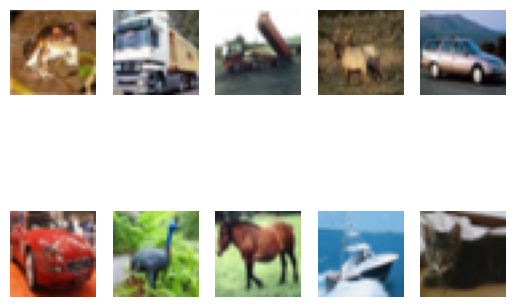

In [5]:
# Your code here :


#Summary this Loads the data, Visualises it,
# and normalizes the CIFAR‑10 images and one‑hot encodes the labels.

from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (x = images, y = labels)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training set:", x_train.shape, "Testing set:", x_test.shape)

# Visualisation Show 10 random images from training set
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

#Neural networks train better when pixel values are small.
#Currently, pixel values are between 0 and 255. We scale them down to 0–1.

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#Labels like “0”, “1”, “2” are
#converted into one-hot encoded vectors so the model can classify among multiple classes.

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



In [7]:

#This code builds and compiles a Convolutional Neural Network (CNN) for classifying CIFAR-10 images (32x32 pixels, 3 color channels)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


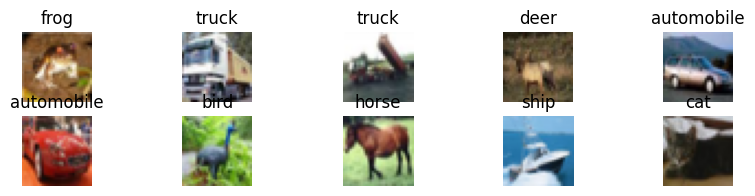

In [8]:

#Visualise thw data and labels

import numpy as np
import matplotlib.pyplot as plt

class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])

    # Works for both one-hot or integer labels
    label_index = np.argmax(y_train[i]) if y_train.ndim > 1 else y_train[i][0]
    plt.title(class_names[int(label_index)])
    plt.axis('off')

plt.show()



In [9]:

#train the model, This code trains your CNN model with automatic performance tracking and early stopping,
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Callback list: 1) Automatically save the model with the best validation score,
# 2) Stop early if validation loss doesn't improve for 5 epochs
callbacks = [
    ModelCheckpoint('best_baseline.h5', save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

# Train the model for up to 10 epochs,
# using 10% of training data for validation.
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,      # You can increase this if training is fast, callbacks will halt if needed
    validation_split=0.1,
    callbacks=callbacks
)



Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.3178 - loss: 1.8223

704/704 ━━━━━━━━━━━━━━━━━━━━ 146s 205ms/step - accuracy: 0.3180 - loss: 1.8220 - val_accuracy: 0.5916 - val_loss: 1.1739
Epoch 2/10
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.5725 - loss: 1.2047

704/704 ━━━━━━━━━━━━━━━━━━━━ 194s 193ms/step - accuracy: 0.5725 - loss: 1.2045 - val_accuracy: 0.6684 - val_loss: 0.9507
Epoch 3/10
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.6559 - loss: 0.9794

704/704 ━━━━━━━━━━━━━━━━━━━━ 132s 188ms/step - accuracy: 0.6559 - loss: 0.9794 - val_accuracy: 0.7148 - val_loss: 0.8107
Epoch 4/10
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.6929 - loss: 0.8719

704/704 ━━━━━━━━━━━━━━━━━━━━ 134s 191ms/step - accuracy: 0.6929 - loss: 0.8719 - val_accuracy: 0.7462 - val_loss: 0.7329
Epoch 5/10
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.7265 - loss: 0.7854

704/704 ━━━━━━━━━━━━━━━━━━━━ 142s 190ms/step - accuracy: 0.7265 - loss: 0.7854 - val_accuracy: 0.7602 - val_loss: 0.7055
Epoch 6/10
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.7417 - loss: 0.7329

704/704 ━━━━━━━━━━━━━━━━━━━━ 142s 190ms/step - accuracy: 0.7418 - loss: 0.7329 - val_accuracy: 0.7718 - val_loss: 0.6719
Epoch 7/10
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.7550 - loss: 0.6916

704/704 ━━━━━━━━━━━━━━━━━━━━ 141s 189ms/step - accuracy: 0.7550 - loss: 0.6916 - val_accuracy: 0.7736 - val_loss: 0.6617
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.7742 - loss: 0.6422

704/704 ━━━━━━━━━━━━━━━━━━━━ 133s 188ms/step - accuracy: 0.7742 - loss: 0.6423 - val_accuracy: 0.7828 - val_loss: 0.6363
Epoch 9/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 136s 194ms/step - accuracy: 0.7824 - loss: 0.6177 - val_accuracy: 0.7826 - val_loss: 0.6381
Epoch 10/10
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.8002 - loss: 0.5721

704/704 ━━━━━━━━━━━━━━━━━━━━ 133s 189ms/step - accuracy: 0.8002 - loss: 0.5722 - val_accuracy: 0.7904 - val_loss: 0.6249


In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Get final training metrics from history
final_loss = history.history['loss'][-1]
final_accuracy = history.history['accuracy'][-1]
print(f"Final Training Loss: {final_loss:.4f}")
print(f"Final Training Accuracy: {final_accuracy:.4f}")

# Make predictions on test data
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Calculate classification metrics
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


Final Training Loss: 0.5853
Final Training Accuracy: 0.7928
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step
Test Precision: 0.7793
Test Recall: 0.7775
Test F1 Score: 0.7755


Final Training Loss: 0.5853
Final Training Accuracy: 0.7928
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
Test Accuracy: 0.7775
Test Precision: 0.7793
Test Recall: 0.7775
Test F1 Score: 0.7755


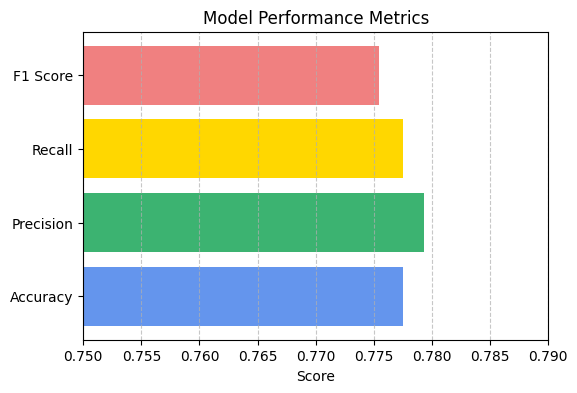

Precision: 0.7793047578064232
Recall: 0.7775
F1: 0.7754710386198069
Accuracy: 0.7775


In [14]:
#Visualisation of the accuracy
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Get final training metrics from training history
final_loss = history.history['loss'][-1]
final_accuracy = history.history['accuracy'][-1]
print(f"Final Training Loss: {final_loss:.4f}")
print(f"Final Training Accuracy: {final_accuracy:.4f}")

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
test_accuracy = accuracy_score(y_true_labels, y_pred_labels)

# Print results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

# Plot metrics as a horizontal bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [test_accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.barh(metrics, values, color=['cornflowerblue', 'mediumseagreen', 'gold', 'lightcoral'])
plt.xlim(0.75, 0.79)  # zoom in to show differences clearly
plt.xlabel('Score')
plt.title('Model Performance Metrics')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("Accuracy:", test_accuracy)



In [9]:
#Accuracy and final Loss
# Get the final loss and accuracy from training history
final_loss = history.history['loss'][-1]
final_accuracy = history.history['accuracy'][-1]

print(f"Final Training Loss: {final_loss:.4f}")
print(f"Final Training Accuracy: {final_accuracy:.4f}")



Final Training Loss: 0.6237
Final Training Accuracy: 0.7800


In [10]:

#This does VGG16 Transfer Learning -
# originally trained on millions of general images and then used on the CIFAR images here to "top up"

from keras.applications import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D

# Load pre-trained VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False  # Freeze layers

# Add custom classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

vgg_model = Model(inputs=base_model.input, outputs=outputs)
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train quickly
vgg_history = vgg_model.fit(x_train, y_train, batch_size=128, epochs=4,
                             validation_split=0.1, callbacks=callbacks)
vgg_model.save('vgg16_transfer.h5')


Epoch 1/4
352/352 ━━━━━━━━━━━━━━━━━━━━ 611s 2s/step - accuracy: 0.3660 - loss: 1.7963 - val_accuracy: 0.5510 - val_loss: 1.2938
Epoch 2/4
352/352 ━━━━━━━━━━━━━━━━━━━━ 617s 2s/step - accuracy: 0.5268 - loss: 1.3574 - val_accuracy: 0.5756 - val_loss: 1.2172
Epoch 3/4
352/352 ━━━━━━━━━━━━━━━━━━━━ 592s 2s/step - accuracy: 0.5518 - loss: 1.2877 - val_accuracy: 0.5860 - val_loss: 1.1829
Epoch 4/4
352/352 ━━━━━━━━━━━━━━━━━━━━ 615s 2s/step - accuracy: 0.5695 - loss: 1.2330 - val_accuracy: 0.5970 - val_loss: 1.1530


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step

baseline Model:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.91      0.86      0.89      1000
           2       0.74      0.56      0.64      1000
           3       0.60      0.58      0.59      1000
           4       0.70      0.76      0.73      1000
           5       0.63      0.73      0.68      1000
           6       0.74      0.89      0.81      1000
           7       0.87      0.79      0.83      1000
           8       0.89      0.86      0.88      1000
           9       0.87      0.85      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 446ms/step

vgg16 Model:
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      1000
           1       0.61      0.67      0.64      1000
           2       0.46      0.53      0.49      1000
           3       0.47      0.37      0.41      1000
           4       0.58      0.49      0.53      1000
           5       0.56      0.51      0.53      1000
           6       0.59      0.69      0.64      1000
           7       0.67      0.62      0.64      1000
           8       0.70      0.69      0.69      1000
           9       0.56      0.63      0.60      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



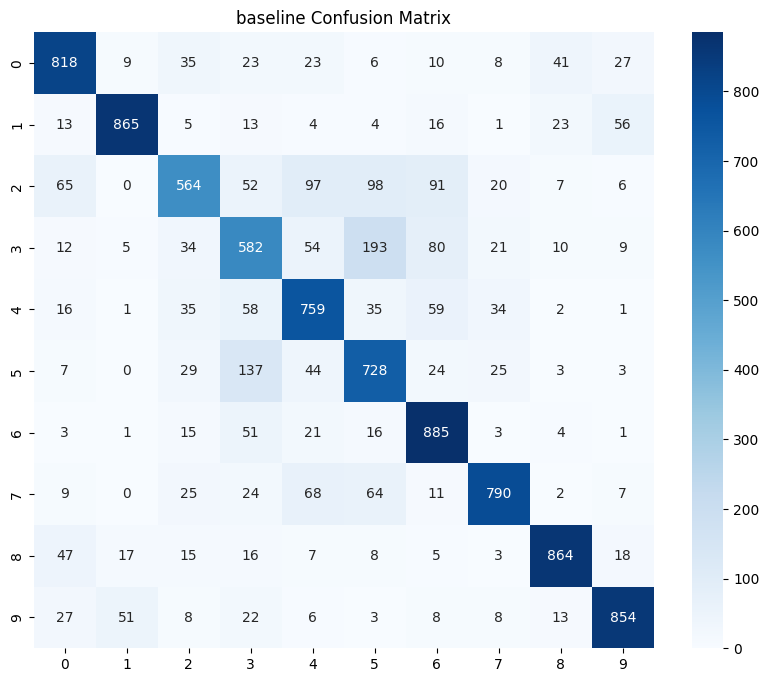

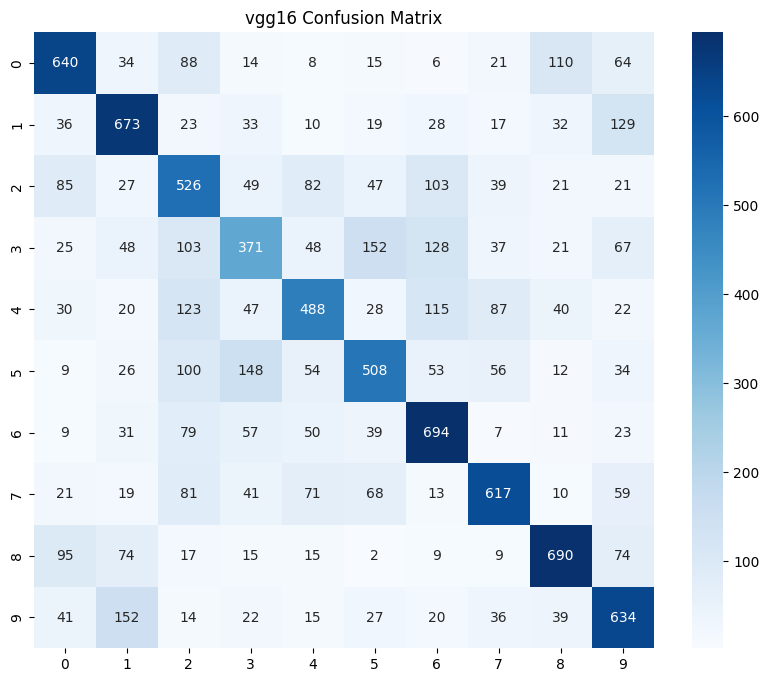

In [11]:

#This code is comparing the two models
#by loading each one, running them on the same test data, and measuring their performance.
# It looks like the baseline model performs best


from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate all models
models = {'baseline': 'best_baseline.h5', 'vgg16': 'vgg16_transfer.h5'}

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix



for name, path in models.items():
    model = keras.models.load_model(path)
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Metrics
    print(f"\n{name} Model:")
    print(classification_report(y_true, y_pred_classes))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.savefig(f'{name}_confusion_matrix.png')


In [15]:
model.save("best_baseline.h5")
vgg_model.save("vgg16_transfer.h5")